In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
df = pd.read_csv("Data.csv", encoding='utf-8')
df.head()

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...

## Q A1 - How many records have a date that is expressed without using alphabets?

In [4]:
def print_complete_dataframe(df):
    for index, row in df.iterrows():
        print(f"Row {index}:")
        print(row['Data'])
        print("\n" + "-" * 100 + "\n")

In [5]:
df.shape

(7339, 1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7339 entries, 0 to 7338
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    7339 non-null   object
dtypes: object(1)
memory usage: 57.5+ KB


In [7]:
df.dtypes

Data    object
dtype: object

In [8]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

### prompt Used : "Inlcude all the dates patterns to identify in my datset"

In [9]:
date_pattern = r'\b\d{1,4}[-\/\.]\d{1,2}[-\/\.]\d{1,4}\b|\b\d{1,2}[-\/\.]\d{1,2}[-\/\.]\d{1,4}\b'

In [10]:
matches = df[df['Data'].str.contains(date_pattern, na=False, regex=True)]

In [11]:
date_rows = df[df['Data'].str.contains(date_pattern, regex=True, na=False)]

In [12]:
print(date_rows)

                                                                                                              Data
3393  Account is not monitored 24/7. Questions: call 780-743-7000. Emergencies: call 9-1-1 rmwb.ca/en/mayor-counc…
4046  Account is not monitored 24/7. Questions: call 780-743-7000. Emergencies: call 9-1-1 rmwb.ca/en/mayor-counc…
5536  Account is not monitored 24/7. Questions: call 780-743-7000. Emergencies: call 9-1-1 rmwb.ca/en/mayor-counc…
6855  Account is not monitored 24/7. Questions: call 780-743-7000. Emergencies: call 9-1-1 rmwb.ca/en/mayor-counc…


### Its including rows consisting of other numeric values like '9-1-1', '24/7' and phone numbers.

### Prompt used to solve this:"it is including 24/7,9-1-1, other numericals  etc as well. ignore them"

In [14]:
# Exclude rows with alphabets and known false positives (non-capturing group used)
exclude_pattern = r'\b(?:24/7|9-1-1|1-877|1-800|8:|am|pm)\b'

In [15]:
mask = (df['Data'].str.contains(date_pattern, regex=True) &~df['Data'].str.contains(r'[a-zA-Z]', regex=True) &
    ~df['Data'].str.contains(exclude_pattern, case=False, regex=True))

In [16]:
result = df[mask]

In [17]:
print(f"Number of rows with valid numeric dates: {len(result)}")
print(result)

Number of rows with valid numeric dates: 0
Empty DataFrame
Columns: [Data]
Index: []


# Q2 - How many records have a word starting with the letter “w”?

In [7]:
import pandas as pd
import re

In [8]:
df = pd.read_csv("Data.csv")

In [9]:
df.head()

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...

In [10]:
df_no_duplicates = df.drop_duplicates()

In [11]:
df_no_duplicates.to_csv("Data_no_duplicates.csv", index=False)

In [12]:
print("Duplicate rows removed. New file saved as 'Data_no_duplicates.csv'")

Duplicate rows removed. New file saved as 'Data_no_duplicates.csv'


In [13]:
df=pd.read_csv("Data_no_duplicates.csv")

In [16]:
pattern = r'\bw[a-zA-Z]+\b'

In [17]:
count = df['Data'].str.contains(pattern, regex=True, na=False).sum()

In [18]:
print("Number of rows with a word starting with lowercase 'w' (excluding alphanumerics):", count)

Number of rows with a word starting with lowercase 'w' (excluding alphanumerics): 631


## Q3 - How many records make a word that starts with an alphabet and is not a URL?

In [19]:
word_pattern = r'\b[a-zA-Z][\w-]*\b'

In [20]:
url_pattern = r'\b(?:https?|ftp|file|www)\S*'

In [21]:
mask = df['Data'].str.contains(word_pattern) & ~df['Data'].str.contains(url_pattern, case=False)

In [22]:
result = df[mask]

In [23]:
print(f"🔍 Number of records with a not word starting with an alphabet and  a URL: {len(result)}")
print(result)

🔍 Number of records with a not word starting with an alphabet and  a URL: 7301
                                                                                                                                                                         Data
0                                           Watch or listen live weekdays at 8:30am MT at ryanjespersen.com. Subscribe via YouTube or your favourite podcast app. #RealTalkRJ
1                                           Watch or listen live weekdays at 8:30am MT at ryanjespersen.com. Subscribe via YouTube or your favourite podcast app. #RealTalkRJ
2                                                                                                                                        Chubby And Hot, Always Stir The Pot!
3                                                                                                                                        Chubby And Hot, Always Stir The Pot!
4                   Journalist, publisher of Rebel 

# Q4 - How many tweets contain one of these emojis :), :D, ;), :P?

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Data.csv") 

In [3]:
df = df.drop_duplicates()

In [4]:
pattern = r'(?:\:\)|:D|;\)|:P)'

In [7]:
count = df['Data'].str.contains(pattern, regex=True, na=False).sum()

In [8]:
print("Number of tweets with emojis :), :D, ;), :P (after removing duplicates):", count)

Number of tweets with emojis :), :D, ;), :P (after removing duplicates): 4


In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('Data.csv')

In [11]:
data.head()

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...

# Q5: How many records contain a decimal number?

In [12]:
decimal_pattern = r'\d+\.\d+'
decimal_records = data[data['Data'].str.contains(decimal_pattern, regex=True, na=False)]
decimal_count = len(decimal_records)

print(f"Number of records with decimal numbers: {decimal_count}\n")

if not decimal_records.empty:
    # Count duplicates
    duplicate_counts = decimal_records['Data'].value_counts()
    
    print("=" * 80)
    print("RECORDS WITH DECIMAL NUMBERS (UNIQUE RECORDS WITH DUPLICATE COUNTS)")
    print("=" * 80)
    
    # Track printed records to avoid repeats
    printed_records = set()
    
    for record in decimal_records['Data']:
        if record not in printed_records:
            printed_records.add(record)
            
            count = duplicate_counts[record]
            print("\n" + "=" * 150)
            print(f"[ORIGINAL RECORD] (Appears {count} time{'s' if count > 1 else ''})")
            print("-" * 150)
            print(repr(record))
            
            # Extract and display decimal numbers
            import re
            decimals = re.findall(r'\d+\.\d+', record)
            print("\n[DECIMAL NUMBERS FOUND]:")
            print("-" * 150)
            print(", ".join(decimals))
            print("=" * 150 + "\n")
else:
    print("No records contain decimal numbers.")

Number of records with decimal numbers: 27

RECORDS WITH DECIMAL NUMBERS (UNIQUE RECORDS WITH DUPLICATE COUNTS)

[ORIGINAL RECORD] (Appears 2 times)
------------------------------------------------------------------------------------------------------------------------------------------------------
"Don Hladiuk is Calgary's eye on astronomy & space science news. On the CBC EyeOpener 1010AM or 99.1FM on the 1st or 2nd Monday of the month at 7:36 AM MT."

[DECIMAL NUMBERS FOUND]:
------------------------------------------------------------------------------------------------------------------------------------------------------
99.1


[ORIGINAL RECORD] (Appears 8 times)
------------------------------------------------------------------------------------------------------------------------------------------------------
'AIR 106.1 FM + DiscoverAirdrie Local News.\nWant to win a truck? Our Ram Everyday Adventure Contest is BACK!\n\n@RadioClaireMC'

[DECIMAL NUMBERS FOUND]:
-----------------

# Q6 - What is the total number of ip addresses across all the records?

In [1]:
import pandas as pd
import re 

In [3]:
df = pd.read_csv('data.csv')

In [12]:
def extract_ip_addresses(text):
    # Regular expression to match IP addresses
    pattern = r'\b(?:(?:25[0-5]|2[0-4][0-9]|1?[0-9]{1,2})\.){3}(?:25[0-5]|2[0-4][0-9]|1?[0-9]{1,2})\b'
    return re.findall(pattern, text)

ip_lists = df['Data'].apply(extract_ip_addresses)

all_ips = [ip for sublist in ip_lists for ip in sublist]

# Show total number of IP and the list of IPs if available
print("Total number of IP addresses:", len(all_ips))
print("List of IP addresses:", all_ips)

Total number of IP addresses: 0
List of IP addresses: []


# Q7: Howmanyrecords have a new line?

In [13]:
newline_pattern = r'\n'
newline_records = data[data['Data'].str.contains(newline_pattern, regex=True, na=False)]
newline_count = len(newline_records)

print(f"Number of records with newlines: {newline_count}\n")

if not newline_records.empty:
    # Count duplicates
    duplicate_counts = newline_records['Data'].value_counts()
    
    print("=" * 80)
    print("RECORDS WITH NEWLINES (UNIQUE RECORDS WITH DUPLICATE COUNTS)")
    print("=" * 80)
    
    # Track printed records to avoid repeats
    printed_records = set()
    
    for record in newline_records['Data']:
        if record not in printed_records:
            printed_records.add(record)
            
            count = duplicate_counts[record]
            print("\n" + "=" * 150)
            print(f"[ORIGINAL RECORD] (Appears {count} time{'s' if count > 1 else ''})")
            print("-" * 150)
            print(repr(record))
            
            print("\n[RENDERED WITH LINE BREAKS]:")
            print("-" * 150)
            print(record)
            print("=" * 150 + "\n")
else:
    print("No records contain newline characters.")

Number of records with newlines: 1211

RECORDS WITH NEWLINES (UNIQUE RECORDS WITH DUPLICATE COUNTS)

[ORIGINAL RECORD] (Appears 2 times)
------------------------------------------------------------------------------------------------------------------------------------------------------
'Think-tank president. Out-of-touch opinion elite. Proud husband of a teacher. Albertan. 🌈 #LGBTQally (he/him)\nMastodon: @seandunn@hachyderm.io'

[RENDERED WITH LINE BREAKS]:
------------------------------------------------------------------------------------------------------------------------------------------------------
Think-tank president. Out-of-touch opinion elite. Proud husband of a teacher. Albertan. 🌈 #LGBTQally (he/him)
Mastodon: @seandunn@hachyderm.io


[ORIGINAL RECORD] (Appears 8 times)
------------------------------------------------------------------------------------------------------------------------------------------------------
'Traveller, nature lover, photographer. HR Profession

# Q8 - What is the total number of hashtags across all these tweets?

In [1]:
import pandas as pd
import re

In [2]:
# Load the CSV file
df = pd.read_csv("Data.csv")  # Adjust path if necessary

In [3]:
# Function to count hashtags using regex
def count_hashtags(text):
    if pd.isnull(text):
        return 0
    return len(re.findall(r"#\w+", text))

In [4]:
# Apply the function to the Data column and sum the results
total_hashtags = df['Data'].apply(count_hashtags).sum()

In [5]:
# Display the total number of hashtags
print("Total number of hashtags:", total_hashtags)

Total number of hashtags: 2924


# Q9: Code to substitute all non-alphanumeric characters with a new line

In [1]:
import pandas as pd
import re

In [2]:
df = pd.read_csv('Data.csv')

In [3]:
df.head()

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...

In [5]:
non_alnum_pattern = r'[^a-zA-Z0-9\s]'  
non_alnum_records = df[df['Data'].str.contains(non_alnum_pattern, regex=True, na=False)]
non_alnum_count = len(non_alnum_records)

print(f"Number of records with non-alphanumeric characters: {non_alnum_count}\n")

if not non_alnum_records.empty:
    # Count duplicates
    duplicate_counts = non_alnum_records['Data'].value_counts()
    
    print("=" * 80)
    print("RECORDS WITH NON-ALPHANUMERIC CHARACTERS (UNIQUE RECORDS WITH COUNTS)")
    print("=" * 80)
    
    # Track printed records to avoid repeats
    printed_records = set()
    
    for record in non_alnum_records['Data']:
        if record not in printed_records:
            printed_records.add(record)
            
            count = duplicate_counts[record]
            print("\n" + "=" * 80)
            print(f"[ORIGINAL RECORD] (Appears {count} time{'s' if count > 1 else ''})")
            print("-" * 80)
            print(repr(record))
            
            # Replace non-alphanumeric chars with newline
            modified_record = re.sub(
                r'[^a-zA-Z0-9\s]', 
                '\n', 
                record
            )
            
            print("\n[MODIFIED RECORD (Non-alphanumeric → Newline ]:")
            print("-" * 80)
            print(repr(modified_record))
            
            print("\n[MODIFIED RECORD with new lines]:")
            print("-" * 80)
            print(modified_record)
            print("=" * 80 + "\n")
else:
    print("No records contain non-alphanumeric characters.")

Number of records with non-alphanumeric characters: 7069

RECORDS WITH NON-ALPHANUMERIC CHARACTERS (UNIQUE RECORDS WITH COUNTS)

[ORIGINAL RECORD] (Appears 2 times)
--------------------------------------------------------------------------------
'Watch or listen live weekdays at 8:30am MT at ryanjespersen.com. Subscribe via YouTube or your favourite podcast app. #RealTalkRJ'

[MODIFIED RECORD (Non-alphanumeric → Newline ]:
--------------------------------------------------------------------------------
'Watch or listen live weekdays at 8\n30am MT at ryanjespersen\ncom\n Subscribe via YouTube or your favourite podcast app\n \nRealTalkRJ'

[MODIFIED RECORD with new lines]:
--------------------------------------------------------------------------------
Watch or listen live weekdays at 8
30am MT at ryanjespersen
com
 Subscribe via YouTube or your favourite podcast app
 
RealTalkRJ


[ORIGINAL RECORD] (Appears 2 times)
-----------------------------------------------------------------------

## Code to substitute all non-alphanumeric characters with a new line excluding time formats and .com formats in URLs and emails

In [6]:
non_alnum_pattern = r'(?!(?<=\d)[:\/](?=\d))[^a-zA-Z0-9\s]'  # Excludes time formats
non_alnum_records = df[df['Data'].str.contains(non_alnum_pattern, regex=True, na=False)]
non_alnum_count = len(non_alnum_records)

print(f"Number of records with non-alphanumeric characters: {non_alnum_count}\n")

if not non_alnum_records.empty:
    # Count duplicates
    duplicate_counts = non_alnum_records['Data'].value_counts()
    
    print("=" * 80)
    print("RECORDS WITH NON-ALPHANUMERIC CHARACTERS (UNIQUE RECORDS WITH COUNTS)")
    print("=" * 80)
    
    # Track printed records to avoid repeats
    printed_records = set()
    
    for record in non_alnum_records['Data']:
        if record not in printed_records:
            printed_records.add(record)
            
            count = duplicate_counts[record]
            print("\n" + "=" * 80)
            print(f"[ORIGINAL RECORD] (Appears {count} time{'s' if count > 1 else ''})")
            print("-" * 80)
            print(repr(record))
            
            # Replace non-alphanumeric chars with newline, preserving time/email/URL patterns
            modified_record = re.sub(
                r'(?!(?<=\d)[:\/](?=\d))'  # Don't replace : or / between digits (time/date)
                r'(?!(?:@|\.(?:com|org|net|edu|gov)\b))'  # Don't replace in emails/URLs
                r'[^a-zA-Z0-9\s]', 
                '\n', 
                record
            )
            
            print("\n[MODIFIED RECORD (Non-alphanumeric → Newline, preserving times/emails/URLs)]:")
            print("-" * 80)
            print(repr(modified_record))
            
            print("\n[MODIFIED RECORD with new lines]:")
            print("-" * 80)
            print(modified_record)
            print("=" * 80 + "\n")
else:
    print("No records contain non-alphanumeric characters.")

Number of records with non-alphanumeric characters: 7069

RECORDS WITH NON-ALPHANUMERIC CHARACTERS (UNIQUE RECORDS WITH COUNTS)

[ORIGINAL RECORD] (Appears 2 times)
--------------------------------------------------------------------------------
'Watch or listen live weekdays at 8:30am MT at ryanjespersen.com. Subscribe via YouTube or your favourite podcast app. #RealTalkRJ'

[MODIFIED RECORD (Non-alphanumeric → Newline, preserving times/emails/URLs)]:
--------------------------------------------------------------------------------
'Watch or listen live weekdays at 8:30am MT at ryanjespersen.com\n Subscribe via YouTube or your favourite podcast app\n \nRealTalkRJ'

[MODIFIED RECORD with new lines]:
--------------------------------------------------------------------------------
Watch or listen live weekdays at 8:30am MT at ryanjespersen.com
 Subscribe via YouTube or your favourite podcast app
 
RealTalkRJ


[ORIGINAL RECORD] (Appears 2 times)
-------------------------------------------

# Q10 - What is the total number of URLs across all tweets?

In [5]:
import re
import pandas as pd


In [1]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path='/content/drive/MyDrive/Data.csv'

In [85]:
df = pd.read_csv(file_path)
df.head(10)

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...
5  Edmonton City Councillor for #WardMétis. #YEG ...
6  Albertan. Mom to children & dogs. Wife. Friend...
7  Albertan. Mom to children & dogs. Wife. Friend...
8  Albertan. Mom to children & dogs. Wife. Friend...
9  Albertan. Mom to children & dogs. Wife. Friend...

In [88]:

df = pd.read_csv(file_path)

#URL regex pattern
word_url_pattern = r'(?:https?|ftp)://[^\s,"]+|www\.[^\s,"]+|[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}(?:/[^\s,"]*)?'

# Finding all URLs in the column
urls = df['Data'].str.findall(word_url_pattern)

# Count total number of URLs across all tweets
total_urls = urls.apply(len).sum()

print("Number of URLs:", total_urls)

Number of URLs: 1353


# PART B
# Q1 - Use porter stemmer to run stemming. Count the number of unique words/tokens before and after stemming

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import re

#Importing library for stemming
from nltk.stem import PorterStemmer

#Importing library for lemmatizer
from nltk.stem import WordNetLemmatizer

import nltk
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /Users/mukulgarg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
#Load Dataset File
#Replace the dataset file path with your own dataset path
dataset = pd.read_csv("data.csv")

In [4]:
#printing first 5 rows of data
dataset.head(5)

Data
0  Watch or listen live weekdays at 8:30am MT at ...
1  Watch or listen live weekdays at 8:30am MT at ...
2               Chubby And Hot, Always Stir The Pot!
3               Chubby And Hot, Always Stir The Pot!
4  Journalist, publisher of Rebel News — telling ...

In [5]:
len(dataset)

7339

In [6]:
# Checking for duplicate rows
dataset[dataset.duplicated()].head(10)

Data
1   Watch or listen live weekdays at 8:30am MT at ...
3                Chubby And Hot, Always Stir The Pot!
7   Albertan. Mom to children & dogs. Wife. Friend...
8   Albertan. Mom to children & dogs. Wife. Friend...
9   Albertan. Mom to children & dogs. Wife. Friend...
11  Former progressive conservative specializing i...
13  I'm Kuno, a Gov't qualified service dog in Alb...
14  Albertan. Mom to children & dogs. Wife. Friend...
15  Albertan. Mom to children & dogs. Wife. Friend...
16  Albertan. Mom to children & dogs. Wife. Friend...

In [7]:
# Total number of duplicated rows
dataset.duplicated().sum()

5353

In [8]:
#dropping duplicate rows to reduce computation
dataset = dataset.drop_duplicates()

In [9]:
len(dataset)

1986

In [10]:
#Joining all the text data into a single string
text_data = ' '.join(dataset['Data'].astype(str)).lower()
#text_data

In [11]:
#All text data into a single string
#text_data

In [12]:
review = re.sub('[^a-zA-Z0-9]',' ',text_data) #Removing non alpha-numeric characters from the text data
#review

In [13]:
tokenized_words = word_tokenize(review)

In [14]:
#print(tokenized_words)

In [15]:
len(tokenized_words)

32126

## Count of unique words/tokens before stemming/Lemmatization

In [17]:
unique_words = set(tokenized_words)

In [18]:
unique_word_counts = len(unique_words)

In [19]:
#print(unique_words)

In [20]:
unique_word_counts

7893

# Stemming

## Count of unique words/tokens After stemming

In [23]:
# Initializing Porter Stemmer
stemmer = PorterStemmer()

# Applying stemming to each word/token
stemmed_words = [stemmer.stem(token) for token in tokenized_words]

# Count unique tokens after stemming
stemmed_unique_words = set(stemmed_words)
stemmed_unique_words_count = len(stemmed_unique_words)

In [24]:
stemmed_unique_words_count

6528

In [25]:
#print(stemmed_unique_words)

In [26]:
print("Count of Unique words before stemming:",unique_word_counts)
print("Count of Unique words after stemming:",stemmed_unique_words_count)

Count of Unique words before stemming: 7893
Count of Unique words after stemming: 6528


## Q-B1: Use porter stemmer to run stemming. Count the number of unique words/tokens before and after stemming

## Stemming Result:
### As can be seen from above the number of unique words before and after stemming have been reduced from 7893 to 6528.

# Lemmatization

## Count of unique words/tokens after Lemmatization

In [30]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Applying lemmatization to each word/token
lemma_words = [lemmatizer.lemmatize(token) for token in tokenized_words]

# Count unique tokens after lemmatization
lemma_unique_words = set(lemma_words)
lemma_unique_words_count = len(lemma_unique_words)

In [31]:
#print(lemma_unique_words)

In [32]:
lemma_unique_words_count

7334

In [33]:
print("Count of Unique words before lemmatization:",unique_word_counts)
print("Count of Unique words after lemmatization:",lemma_unique_words_count)

Count of Unique words before lemmatization: 7893
Count of Unique words after lemmatization: 7334


## Q-B2: Perform lemmatization using NLTK lemmatizer . Count the number of unique words/tokens before and after lemmatization?

## Lemmatization Result:
### As can be seen from above the number of unique words before and after lemmatization have been reduced from 7893 to 7334.

## Q-B3: Compare the change in word frequencies from stemming and lemmatization. Which are the top 10 words after stemming/lemmatization?

In [36]:
from collections import Counter
import matplotlib.pyplot as plt

In [37]:
# Count word frequencies
stemmed_freq = Counter(stemmed_words)
lemmatized_freq = Counter(lemma_words)

In [38]:
# Get top 10 most common words
top_10_stemmed = stemmed_freq.most_common(10)
top_10_lemmatized = lemmatized_freq.most_common(10)

In [39]:
# Display results
print("🔍 Top 10 Words After Stemming:")
for word, count in top_10_stemmed:
    print(f"{word}: {count}")

🔍 Top 10 Words After Stemming:
and: 859
the: 768
of: 677
to: 497
a: 460
in: 417
for: 363
i: 339
my: 300
is: 235


In [40]:
print("\n🔍 Top 10 Words After Lemmatization:")
for word, count in top_10_lemmatized:
    print(f"{word}: {count}")


🔍 Top 10 Words After Lemmatization:
and: 859
the: 768
of: 677
a: 513
to: 497
in: 417
for: 363
i: 339
my: 300
is: 235


**Optional Just For Knowledge**

In [42]:
# Optional: Plot the comparison
stemmed_df = pd.DataFrame(top_10_stemmed, columns=['Word', 'Frequency']).set_index('Word')
lemmatized_df = pd.DataFrame(top_10_lemmatized, columns=['Word', 'Frequency']).set_index('Word')

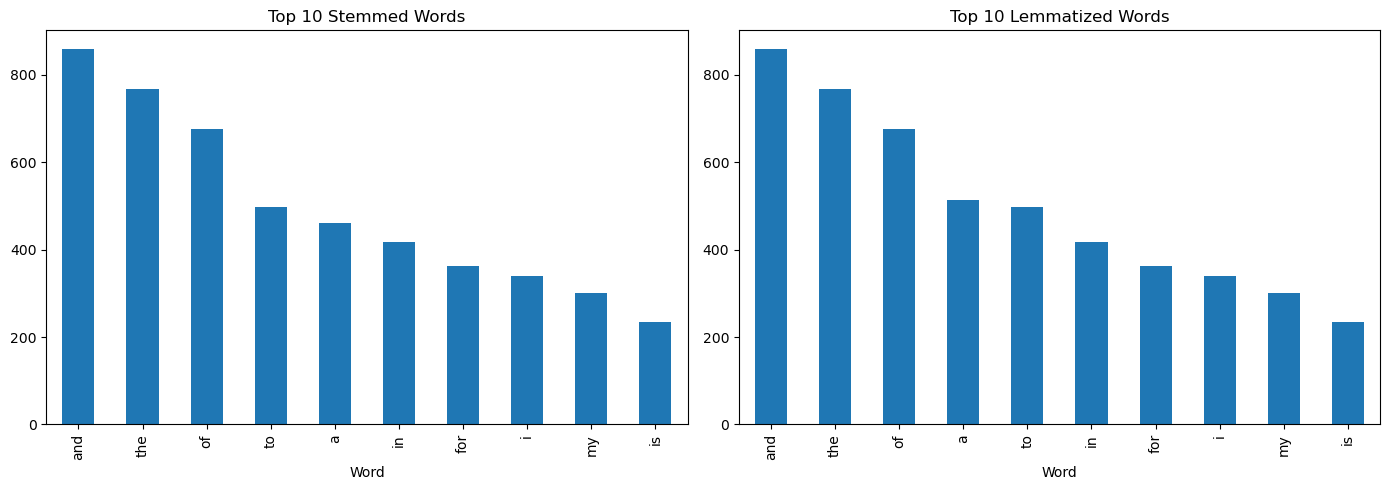

In [43]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
stemmed_df.plot.bar(ax=axes[0], title="Top 10 Stemmed Words", legend=False)
lemmatized_df.plot.bar(ax=axes[1], title="Top 10 Lemmatized Words", legend=False)
plt.tight_layout()
plt.show()

## Q-B4: What is the change in word frequencies if normalization is done after stop word removal?

In [45]:
#Importing Libraries
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mukulgarg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [46]:
sentences = nltk.sent_tokenize(text_data)

In [47]:
#sentences

In [48]:
# Removing special characters and lowercasing
import re
corpus=[]
for i in range(len(sentences)):
    review = re.sub('[^a-zA-Z0-9]',' ',sentences[i]) #substitutes values that are not a-z, A-Z, 0-9 with blank spaces
    review = re.sub(' +', ' ', review).strip() # removing extra blank spaces
    review = review.lower() #lowercasing
    corpus.append(review) 

In [49]:
#corpus

In [50]:
stop_words = set(stopwords.words('english'))
np.array(list(stop_words))

array(['yourself', 'too', 'through', 'didn', 'as', 'll', 'you', 'down',
       "should've", "isn't", 'once', 've', 'the', 'hasn', 's', 'that',
       'nor', 'under', 'ma', 're', 'up', 'very', 'whom', 'won', 'only',
       'such', 'wouldn', 'theirs', 'above', 'had', "it'll", 'she',
       'doing', 'i', 'again', 'on', 'below', 'he', "needn't", 'm',
       'mightn', "that'll", 'then', "she'd", "you've", 'her', 'those',
       'yours', 'be', 'other', 'or', 'from', 'here', "we're", 'ain',
       'shan', 'they', "it'd", 'wasn', "doesn't", 'at', 'mustn', "wasn't",
       'been', 'its', 'who', "he'd", 'has', "you'd", 'which', 'him',
       'any', "they'd", "they've", "i've", 'haven', 'myself', 'some',
       'couldn', 'ourselves', 'most', 'while', "hadn't", 'needn',
       'yourselves', 'we', "haven't", 'isn', 'a', 'but', "we'd",
       'himself', 'it', 'in', 'were', 'by', 'after', "shan't", "won't",
       "we'll", 'what', 'during', 'further', 'these', "i'd", 'an', 'when',
       'why', "must

## First removing stopwords and then applying stemming for normalization

In [52]:
tokens_a = []
for doc in corpus:
    words = word_tokenize(doc)
    filtered = [w for w in words if w not in stop_words]
    # stemming after stopwords removal
    stemmed = [stemmer.stem(w) for w in filtered]
    tokens_a.extend(stemmed)

In [53]:
len(tokens_a)

22821

## First removing stopwords and then applying lemmatization for normalization

In [55]:
tokens_b = []
for doc in corpus:
    words = word_tokenize(doc)
    filtered = [w for w in words if w not in stop_words]
    # lemmatization after stopwords removal
    lemmatized = [lemmatizer.lemmatize(w) for w in filtered]
    tokens_b.extend(lemmatized)

In [56]:
len(tokens_b)

22821

In [57]:
#Removing Stopwords after stemming
tokens_c = []
for doc in corpus:
    words = word_tokenize(doc)
     # stemming before stopwords removal
    stemmed = [stemmer.stem(w) for w in words]
    filtered = [w for w in stemmed if w not in stop_words]
    tokens_c.extend(filtered)

In [58]:
len(tokens_c)

22956

In [59]:
#Removing Stopwords after lemmatization
tokens_d = []
for doc in corpus:
    words = word_tokenize(doc)
     # lemmatization before stopwords removal
    lemmatize = [lemmatizer.lemmatize(w) for w in words]
    filtered = [w for w in lemmatize if w not in stop_words]
    tokens_d.extend(filtered)

In [60]:
len(tokens_d)

22852

In [61]:
print("Frequencies with Stopword removal After Stemming:")
print(Counter(tokens_c).most_common(10))

print("\nFrequencies with Stopword removal Before Stemming:")
print(Counter(tokens_a).most_common(10))

Frequencies with Stopword removal After Stemming:
[('alberta', 191), ('news', 134), ('love', 125), ('canada', 123), ('commun', 118), ('ca', 104), ('canadian', 102), ('polit', 100), ('live', 98), ('travel', 98)]

Frequencies with Stopword removal Before Stemming:
[('alberta', 191), ('news', 134), ('love', 125), ('canada', 123), ('commun', 118), ('ca', 104), ('canadian', 102), ('polit', 100), ('live', 98), ('travel', 98)]


In [62]:
print("\nFrequencies with Stopword removal After Lemmatization:")
print(Counter(tokens_b).most_common(10))

print("\nFrequencies with Stopword removal Before Lemmatization:")
print(Counter(tokens_b).most_common(10))


Frequencies with Stopword removal After Lemmatization:
[('alberta', 191), ('news', 134), ('canada', 123), ('ca', 104), ('love', 104), ('canadian', 102), ('life', 96), ('community', 92), ('com', 91), ('calgary', 91)]

Frequencies with Stopword removal Before Lemmatization:
[('alberta', 191), ('news', 134), ('canada', 123), ('ca', 104), ('love', 104), ('canadian', 102), ('life', 96), ('community', 92), ('com', 91), ('calgary', 91)]


### Frequencies remains unchanged maybe because normalization has no impact on stop words. Thus, the order for stemming/lemmatization and stop words removal does not matter.